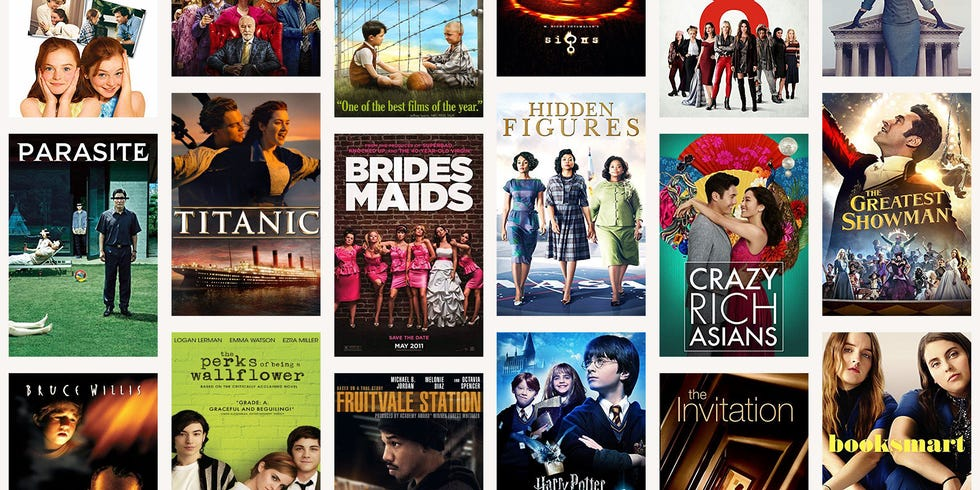

# Finding the Hollywood Formula, Movie Dataset Analysis

**By: Stephen Kipkurui, Ella Xu, Braeden Wright, Nick Dougherty**

***


# Executive Summary


BALABAL

# Project Description

 Using the data available from the Metadata Movie Dataset, our team intends to compare different features of movies made between the year 2000 and present day in an attempt to determine the key features that might predict how successful the movie is(Success being measured by revenue). Once we explore the data, we will look for any trends that show over the past 2 decades that may have affected what makes a movie successful. In those 20 years, streaming has risen in popularity, consumer tastes have changed and even how movies are structured has changed(cinematic universes), all of which may have altered what causes a movie's success. Taking these into account, we can build a model that can predict a movie's success rate , thus giving insight into how to outline movies for maximum success in the theaters.

# Project Goal

We want to determine if there is a "Hollywood formula" to making a successful movie.

# Initial Questions

1. 
2. 
3. 
4.
5.

# Data Collection

We found an interesting dataset of more than 5000 data points consisting of 28 attributes describing IMDB movies here: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset.


We will be focusing our analysis around domestic gross, which is how much the film earned domestically at the box office during its initial run. This figure is in nominal terms, and will need to be transformed into real terms. Also, this figure exlcludes international earnings, as well as revenue from DVD rentals, television runs, etc. We will be focusing our analysis on films produced within the USA only.

# Import Menagerie

In [1]:
# Basics
import pandas as pd
import numpy as np



# Custom
import final_acquire as fa

# Data Acquisition and Preparation

In [2]:
df = fa.wrangle_df()
df.head()

clean.csv not detected.
Acquiring and Preparing Data
CSV not detected.
Checking to s.


/Users/braedenwright/codeup-data-science/capstone-project/Final/final_acquire.py:322: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  df = prep_data(acquire_data_new())


clean.csv not detected.
processing capstone.csv
clean.csv ready for future use


,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,...,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id
id,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,False,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,...,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,False,1995-12-09,1995,tt0113101
6,Judgment Night,False,4.854775,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,8000000.0,12136938.0,...,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,False,1993-10-15,1993,tt0107286
11,Star Wars,True,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,...,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,True,1977-05-25,1977,tt0076759
12,Finding Nemo,True,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,...,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,True,2003-05-30,2003,tt0266543
13,Forrest Gump,True,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,...,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,True,1994-07-06,1994,tt0109830


In [3]:
df.shape

(7282, 22)

# 